<a href="https://colab.research.google.com/github/chavalvit-k/Yelp-Rating-Regression-Predictor/blob/main/Yelp_Rating_Regression_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yelp Rating Regression Predictor

# Import Standard Libraries

In [403]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import Dataset

In [404]:
businesses = pd.read_json("yelp_business.json", lines=True, encoding="utf8")
reviews = pd.read_json("yelp_review.json", lines=True, encoding="utf8")
users = pd.read_json("yelp_user.json", lines=True, encoding="utf8")
checkins = pd.read_json("yelp_checkin.json", lines=True, encoding="utf8")
photos = pd.read_json("yelp_photo.json", lines=True, encoding="utf8")
tips = pd.read_json("yelp_tip.json", lines=True, encoding="utf8")

In [405]:
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,...,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",...,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",...,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",...,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,...,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",...,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [406]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [407]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [408]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1...",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16'...",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23...",1,4


In [409]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


In [410]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


ใช้ option ในการ join เป็น `"left"` (left join) เพราะว่าต้องการข้อมูลจากทุก business ใน `businesses` หากใช้ `"inner"` (inner join) จะทำให้มีบาง buisness ที่ถูกตัดทิ้ง เพราะว่าไม่มีข้อมูลใน `dataset` `users` `checkins` `photos` หรือ `tips`

In [411]:
df = pd.merge(businesses, reviews, how="left", on="business_id")
df = pd.merge(df, users, how="left", on="business_id")
df = pd.merge(df, checkins, how="left", on="business_id")
df = pd.merge(df, photos, how="left", on="business_id")
df = pd.merge(df, tips, how="left", on="business_id")

In [412]:
df.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,...,average_number_fans,average_review_count,average_number_years_elite,time,weekday_checkins,weekend_checkins,average_caption_length,number_pics,average_tip_length,number_tips
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",...,5.375000,114.875000,1.125000,"{'Fri-0': 1, 'Sun-0': 3, 'Thu-0': 1, 'Fri-1': ...",11.0,18.0,NaN,NaN,38.0,6.0
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",...,2.666667,19.666667,0.666667,{'Sun-1': 1},0.0,1.0,29.0,1.0,66.0,1.0
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",...,1.000000,24.600000,0.600000,"{'Mon-0': 1, 'Sun-0': 1, 'Fri-1': 1, 'Sun-1': ...",2.0,5.0,NaN,NaN,32.0,1.0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,...,2.375000,68.000000,0.250000,{'Wed-18': 1},1.0,0.0,NaN,NaN,NaN,NaN
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",...,26.750000,528.250000,4.250000,"{'Thu-14': 1, 'Thu-20': 1}",2.0,0.0,NaN,NaN,NaN,NaN


# Preprocessing

In [413]:
df.dtypes

,0
address,object
alcohol?,int64
attributes,object
business_id,object
categories,object
city,object
good_for_kids,int64
has_bike_parking,int64
has_wifi,int64
hours,object


ในการทำ linear regression analysis เราต้องการเลือกเฉพาะ variables ที่ส่งผลกับ target variable (`stars`) จริง ๆ โดยสามารถทดสอบได้จากค่า correlation

ค่า correlation ระหว่าง 2 ตัวแปร จะสามารถคำนวณได้ก็ต่อเมื่อ ตัวแปรทั้ง 2 เป็นประเภท numerical ทั้งคู่ และหากเป็นประเภท categorical จะต้องทำการแปลงให้เป็น numerical ก่อน

ดังนั้นในการพิจารณา categorical columns ต่าง ๆ ใน dataset เราจะเลือกเพียง บาง column เท่านั้นที่น่าสนใจ และน่าจะส่งผลกับ target variable

column ที่ชี้เฉพาะเจาะจงได้แก่ `business_id` และ `name` จะไม่ถูกนำมาพิจารณา ส่วน `attributes` `categories` `hours` และ `time` เป็นข้อมูลประเภท object ซึ่งมีความซับซ้อนและความหลากหลายของข้อมูลมาก ทำให้เมื่อแปลงมาเป็น numerical variable แล้ว จะทำให้ตัว dataset มีจำนวน column เพิ่มขึ้นอย่างมาก เป็นการเพิ่มความซับซ้อนของ model เพื่อลดความซับซ้อนของ model จึงไม่นำมาพิจารณา และในส่วนของ column ที่ represent ถึงตำแหน่งที่ตั้งนั้นมีความน่าสนใจ และคาดว่าน่าจะส่งผลกับการทำนาย ได้แก่ `address` `city` `neighborhood` `postal_code` และ `state` โดยจะเลือกใช้เพียง column เดียวในการพิจารณาซึ่งก็คือ `city` เพราะ column ทั้งหมดนี้สื่อถึงตำแหน่งที่ตั้งของ buisness เหมือนกัน


เมื่อเลือกใช้ `city` ในการ represent ตำแหน่งของ buisness แล้ว จึงไม่จำเป็นต้องใช้ `longitude` และ `latitude` ซึ่งเป็น numerical variable เหตุผลในการเลือกใช้ `city` ซึ่งเป็น categorical variable แทนก็คือ `longitude` และ `latitude` นั้นไม่มีมีความสามารถในการ represent เหมือนกับ numerical variable อื่น ๆ กล่าวคือ เมื่อ longitude เพิ่มขึ้น อาจส่งผลให้ค่า target variable เพิ่มขึ้น แต่เมื่อเพิ่มขึ้นอีก อาจส่งผลให้ target variable มีค่าลดลง และหากเพิ่มขึ้นอีกครั้ง ก็อาจจะส่งผลให้ target variable เพิ่มขึ้น แต่ใน numerical variable อื่น ๆ จะมี pattern ที่ชัดเจน เช่น เมื่อ numerical variable นั้น ๆ เพิ่มขึ้น target variable ก็จะเพิ่มขึ้นหรือลดลงตลอด ไม่มีสลับกันขึ้นหรือว่าลง

In [414]:
columns_to_drop = df.select_dtypes(exclude=["int64", "float64"]).columns.tolist()
columns_to_drop.remove("city")
columns_to_drop.append("longitude")
columns_to_drop.append("latitude")
df.drop(columns_to_drop, axis=1, inplace=True)

In [415]:
df.isnull().any()

,0
alcohol?,False
city,False
good_for_kids,False
has_bike_parking,False
has_wifi,False
is_open,False
price_range,False
review_count,False
stars,False
take_reservations,False


<Axes: >

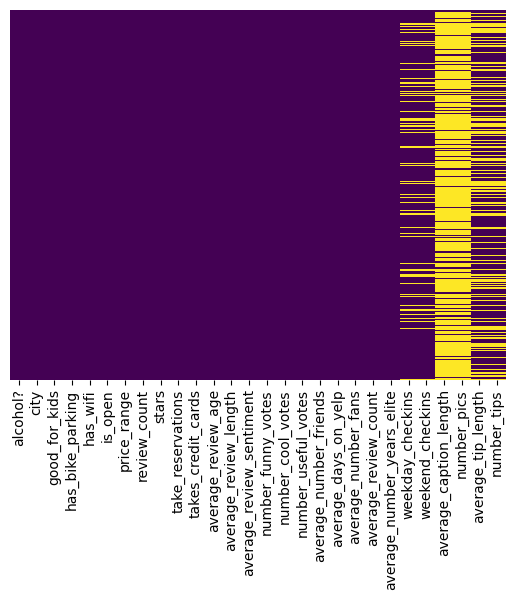

In [416]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

* `weekday_checkins`: จำนวน check in ในวันธรรมดา
* `weekend_checkins`: จำนวน check in ในวันหยุด
* `average_caption_length`: ค่าเฉลี่ยความยาว caption ของรูปภาพที่โพสต์ใน page ของแต่ละ business
* `number_pics`: จำนวนรูปภาพที่โพสต์ใน page ของแต่ละ business
* `average_tip_length`: ค่าเฉลี่ยความยาว tip (คำแนะนำจาก user สำหรับ user คนอื่น ๆ)
* `number_tips`: จำนวน tip ที่ถูกเขียนในแต่ละ business

เราจะใช้วิธีการ fill null value แทนการลบข้อมูลนั้นทิ้ง เพื่อไม่ให้ข้อมูลเหล่านั้นสูญเปล่า

ในกรณีของ `weekday_checkins` และ `weekend_checkins` จะใช้ mean ในการ fill null value

ส่วนอีก 4 columns ที่เหลือ จะสามารถแทนด้วยค่า 0 ได้เลย เพราะว่า represent ถึงการไม่มีของค่านั้น ๆ เช่น `number_pics = 0` หมายถึงไม่มีรูปภาพเลยใน page ของ buisness นั้น

In [417]:
df["weekday_checkins"].fillna(df["weekday_checkins"].mean(), inplace=True)
df["weekend_checkins"].fillna(df["weekend_checkins"].mean(), inplace=True)
df.fillna(0, inplace=True)

<Axes: >

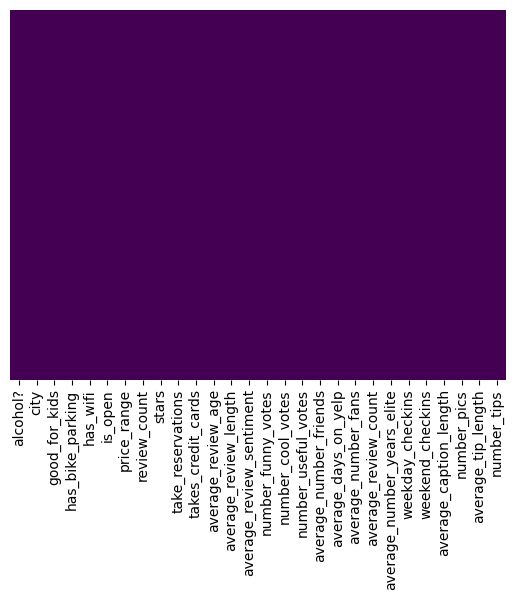

In [418]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

ในขั้นตอนการแปลงจาก categorical variable เป็น numerical variable ของ `city` เมื่อสังเกตจาก count plot จะเห็นได้ว่าต้องมีการรวมบาง class เข้าด้วยกัน (aggregation) เป็น class ใหม่ เนื่องจากบาง class มีจำนวนน้อยมาก ๆ เป็นการลดความซับซ้อนของ model (ลดจำนวน column เมื่อทำ one-hot encoding แล้ว)

<Axes: xlabel='city', ylabel='count'>

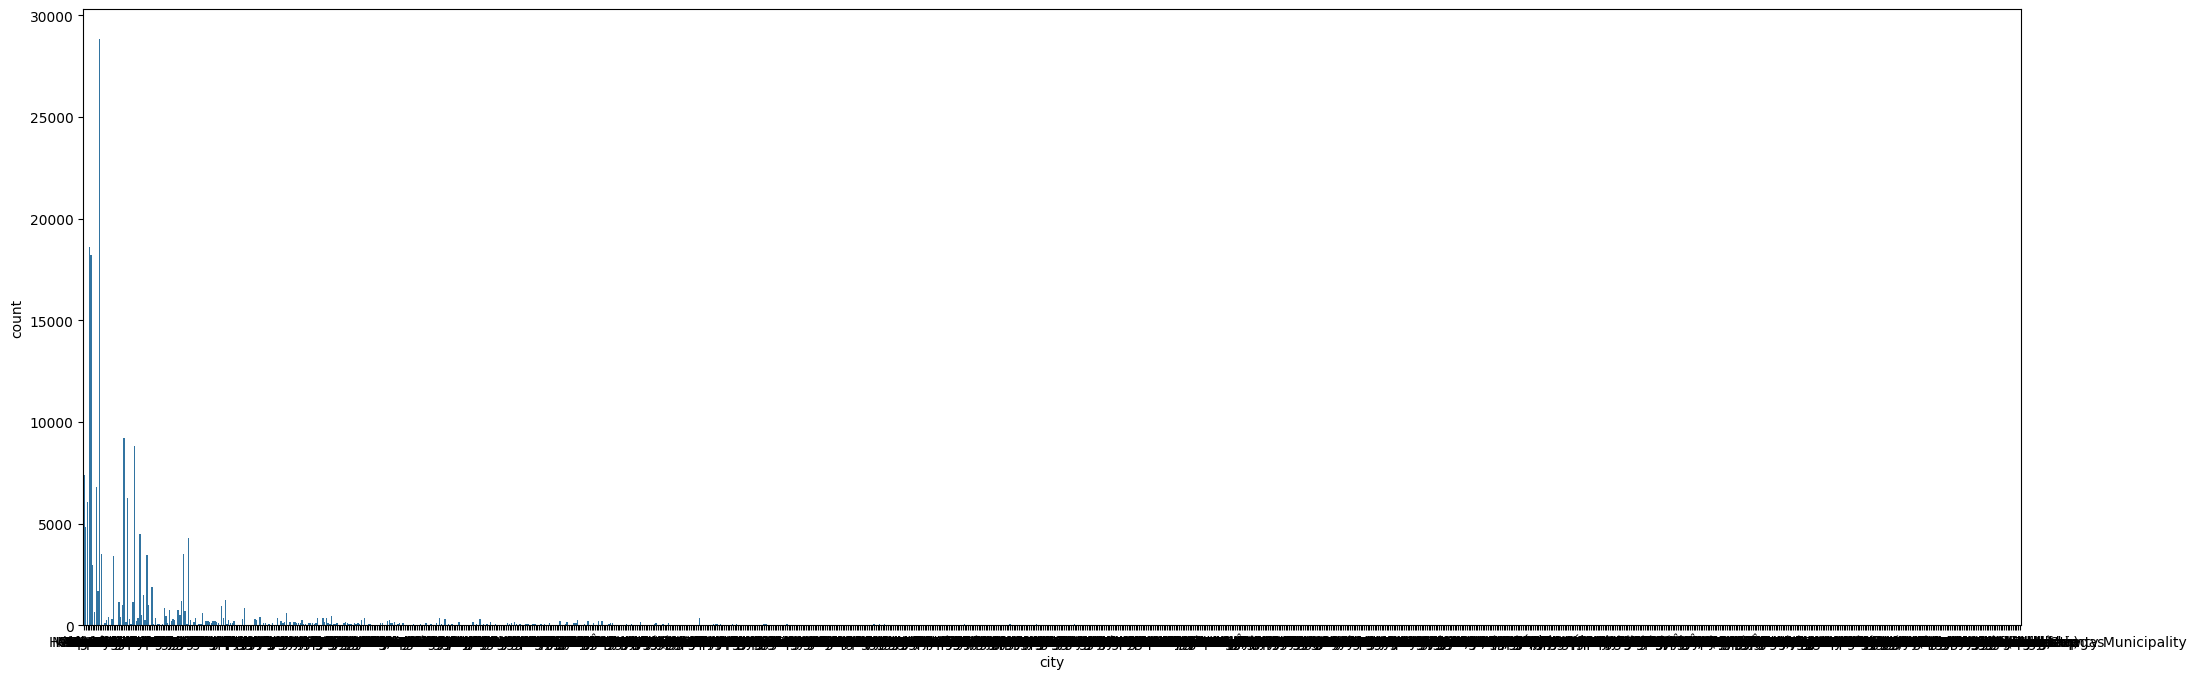

In [419]:
plt.figure(figsize=(25,8))
sns.countplot(x='city', data=df)

รวม class ที่มีจำนวนไม่ถึง 5 % ของจำนวนข้อมูลทั้งหมดเข้าด้วยกัน เป็น column ใหม่ชื่อว่า `Others`

In [432]:
frequency = df["city"].value_counts(normalize=True)
low_frequency = frequency[frequency <= 0.05].index
df["city"].replace(low_frequency, "Others", inplace=True)

<Axes: xlabel='city', ylabel='count'>

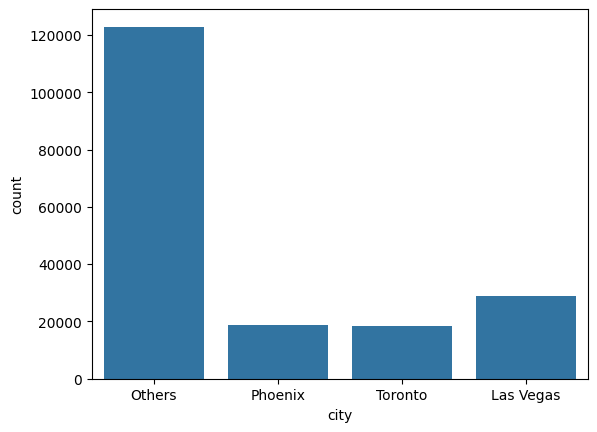

In [433]:
sns.countplot(x="city", data=df)

หลังจากที่ได้จำนวน class ของ `city` ที่น้อยลงแล้ว เหลือเพียงแค่ 4 class ได้แก่ `Others` `Phoenix` `Toronto` และ `Las Vegas` จึงทำ one-hot encoding เพื่อแปลงจาก numerical variable เป็น categorical variable

In [434]:
df_encoded = pd.get_dummies(df, columns=["city"], drop_first=True)
df_encoded.head()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,is_open,price_range,review_count,stars,take_reservations,takes_credit_cards,...,average_number_years_elite,weekday_checkins,weekend_checkins,average_caption_length,number_pics,average_tip_length,number_tips,city_Others,city_Phoenix,city_Toronto
0,0,1,0,0,1,2,24,4.0,1,1,...,1.125000,11.0,18.0,0.0,0.0,38.0,6.0,True,False,False
1,0,1,0,0,0,2,3,4.5,0,1,...,0.666667,0.0,1.0,29.0,1.0,66.0,1.0,True,False,False
2,1,1,1,1,0,2,5,4.0,1,0,...,0.600000,2.0,5.0,0.0,0.0,32.0,1.0,True,False,False
3,0,0,0,0,1,0,8,1.5,0,0,...,0.250000,1.0,0.0,0.0,0.0,0.0,0.0,False,True,False
4,0,0,0,0,1,0,4,2.0,0,1,...,4.250000,2.0,0.0,0.0,0.0,0.0,0.0,True,False,False


# Feature Selection

In [438]:
correlations = df_encoded.corr()["stars"].drop("stars")
correlations = correlations.abs().sort_values(ascending=True)
correlations

,stars
average_caption_length,0.000040
number_useful_votes,0.000066
number_funny_votes,0.001320
number_pics,0.001727
weekday_checkins,0.006805
average_number_friends,0.007629
weekend_checkins,0.010781
number_tips,0.014038
city_Others,0.014447
city_Phoenix,0.017972


ทดลองเลือกใช้ `average_review_sentiment` เป็น independent variable เพียงตัวเดียวก่อน เนื่องจากมีค่า correlation ที่สูงที่สุดต่างจาก variable อื่น ๆ อย่างเห็นได้ชัด

In [439]:
X = df_encoded[["average_review_sentiment"]]
y = df_encoded[["stars"]]

# Split Training and Testing Set

In [466]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [467]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Linear Regression Model

In [469]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
model = linear_reg.fit(X_train_scaled, y_train)

In [470]:
model.coef_[0]

array([ 0.79315406, -0.15202911, -0.08891468,  0.00120661, -0.02873083,
       -0.06507619, -0.02666798, -0.06076541,  0.02958305, -0.02544526,
        0.0152797 , -0.06155249, -0.04942867,  0.06778502,  0.00413795])

In [471]:
model.intercept_

array([3.63044328])

# Evaluate the Model

In [450]:
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

y_prediction = linear_reg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = math.sqrt(mse)
r_squared = r2_score(y_test, y_prediction)

print("MAE = ", mae)
print("MSE = ", mse)
print("RMSE = ", rmse)
print("R^2 = ", r_squared)

MAE =  0.49276898800513164
MSE =  0.4001401134762352
RMSE =  0.63256629176414
R^2 =  0.609771685784544


ค่า `R^2` ที่ได้จาก model แรกที่ใช้ independent variable เพียง `average_review_sentiment` มีค่าประมาณ `0.61` แม้ว่าจะมีค่าไม่มากนัก แต่ยังสามารถเพิ่มได้อีก หากเลือก independent variable ตัวอื่น ๆ ที่ส่งผลกับ target variable มาใช้ในการทำนายเพิ่ม

# Find Best Model

In [487]:
correlations_columns = correlations.index.tolist()
correlations_columns

best_r_squared = 0
independent_variables = []
best_independent_variables = []
coefficients = []
intercept = []

independent_variables.append(correlations_columns.pop())

while True:
  X = df_encoded[independent_variables]
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  linear_reg = LinearRegression()
  model = linear_reg.fit(X_train_scaled, y_train)
  r_squared = linear_reg.score(X_test_scaled, y_test)

  if r_squared <= best_r_squared:
    break

  # Update model independent variables, R^2, coefficients, and intercept
  best_independent_variables = independent_variables.copy()
  best_r_squared = r_squared
  coefficients = model.coef_[0]
  intercept = model.intercept_

  # Add new variables to feature subset
  independent_variables.append(correlations_columns.pop())

In [488]:
best_independent_variables

['average_review_sentiment',
 'average_review_length',
 'average_review_age',
 'has_bike_parking',
 'average_review_count',
 'average_number_years_elite',
 'average_tip_length',
 'price_range',
 'is_open',
 'city_Toronto',
 'number_cool_votes',
 'alcohol?',
 'has_wifi',
 'average_days_on_yelp',
 'takes_credit_cards']

In [489]:
coefficients

array([ 0.79315406, -0.15202911, -0.08891468,  0.00120661, -0.02873083,
       -0.06507619, -0.02666798, -0.06076541,  0.02958305, -0.02544526,
        0.0152797 , -0.06155249, -0.04942867,  0.06778502,  0.00413795])

In [490]:
intercept

array([3.63044328])

In [491]:
X = df_encoded[best_independent_variables]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_reg = LinearRegression()
model = linear_reg.fit(X_train_scaled, y_train)
r_squared = linear_reg.score(X_test_scaled, y_test)

y_prediction = linear_reg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = math.sqrt(mse)
r_squared = r2_score(y_test, y_prediction)

print("MAE = ", mae)
print("MSE = ", mse)
print("RMSE = ", rmse)
print("R^2 = ", r_squared)

MAE =  0.4290480315179908
MSE =  0.3302410815775002
RMSE =  0.5746660609236465
R^2 =  0.67793926125247


หลังจากเลือก feature subset ที่ให้ค่า `R^2` สูงที่สุด จะได้ว่าได้ค่า `R^2` ประมาณ `0.68` เพิ่มจากเดิมประมาณ `0.07` โดยใช้ independent variable ทั้งหมด 15 ตัว

โดยมีข้อสังเกตคือ target variable ซึ่งคือ `stars` นั้นเป็น numerical variable ประเภท discrete ไม่ใช่ continuous ดังนั้นแล้วเมื่อใช้ linear regression ในการทำนาย ผลลัพธ์ที่ได้จะเป็นค่า continuous ซึ่งไม่สอดคล้องกับ target variable ซึ่งมีค่าเป็น discrete

ดังนั้นจึงลองนำค่าที่ทำนายได้มาแปลงจาก continuous ให้เป็นค่า discrete (discretization) โดยจะทำการปัดเลขให้ตรงตาม pattern ของ target variable (ปัดเป็น 0.5 ได้)

In [492]:
y_prediction

array([[2.96805354],
       [3.97296422],
       [4.75471838],
       ...,
       [2.57311553],
       [3.75142469],
       [2.61652513]])

In [493]:
def half_rounding(stars):
  return round(stars * 2) / 2

for i in range(len(y_prediction)):
  y_prediction[i][0] = half_rounding(y_prediction[i][0])

y_prediction

array([[3. ],
       [4. ],
       [5. ],
       ...,
       [2.5],
       [4. ],
       [2.5]])

In [494]:
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = math.sqrt(mse)
r_squared = r2_score(y_test, y_prediction)

print("MAE = ", mae)
print("MSE = ", mse)
print("RMSE = ", rmse)
print("R^2 = ", r_squared)

MAE =  0.412776054508338
MSE =  0.3516198732734166
RMSE =  0.5929754407000484
R^2 =  0.6570900397860591


หลังจากทำการปัดเลขแล้ว พบว่าค่า `R^2` ที่ได้ไม่ได้เพิ่มขึ้นแต่อย่างได้ แต่กลับลดลงด้วยซ้ำ โดยได้ค่า `R^2` อยู่ที่ประมาณ `0.66`

ดังนั้นแล้วสรุปได้ว่าในการทำนาย `stars` ของแต่ละ buisness <b><i>การใช้ linear regression อาจจะไม่เหมาะสมกับปัญหานี้ และหนึ่งในทางเลือกคือ พิจารณาใช้ model อื่นที่เหมาะสมกว่าในการทำนาย<b><i>